In [ ]:
print("Merhaba, İGÜ - YAPAY ZEKA!") # print ekrana çıktı veren bir koddur.

Merhaba, İGÜ - YAPAY ZEKA!


In [ ]:
import sys # import Python programlama dilinde kütüphane eklemeye yarayan bir kod bloğudur.
print(sys.version) # Kodlama yaparken ilk bakılması gereken yer kullanılan kullanılan programlama dilinin sürümüdür.

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
from google.colab import drive # google colab - drive bağlantısını sağlar. Her ders öncesi gün başlarken bu işlemi yapmamız gerekir.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/YapayZeka')
!pwd
# bize kodun çıktısını dosya yolu olarak veren kod blogudur. !! önemli

/content/drive/MyDrive/YapayZeka


In [ ]:
import pandas as pd

tablo = {
    "Aralık": ["Küçük ölçekli", "Orta ölçekli", "Büyük ölçekli", "Hiper ölçekli", "Exascale"],
    "Veri Sayısı": ["100 - 10,000", "10,000 - 100,000", "100,000 - Milyon",  "Milyon - Milyar", "Milyar - Trilyon"],
    "CPU": ["Evet", "Evet", "Opsiyonel", "Hayır", "Hayır"],
    "GPU": ["Hayır", "Opsiyonel", "Evet", "Evet", "Evet"]
}

print(pd.DataFrame(tablo))

          Aralık       Veri Sayısı        CPU        GPU
0  Küçük ölçekli      100 - 10,000       Evet      Hayır
1   Orta ölçekli  10,000 - 100,000       Evet  Opsiyonel
2  Büyük ölçekli  100,000 - Milyon  Opsiyonel       Evet
3  Hiper ölçekli   Milyon - Milyar      Hayır       Evet
4       Exascale  Milyar - Trilyon      Hayır       Evet


In [ ]:
import pandas as pd

matris_bilgisi = {
    "Gerçek Pozitif": ["Doğru Pozitif (TP)","Yanlış Negatif (FN)"],
    "Gerçek Negatif": ["Yanlış Pozitif (FP)","Doğru Negatif (TN)"]
}

matris = pd.DataFrame(matris_bilgisi, index=["Tahmin Pozitif  ||","Tahmin Negatif  ||"]) # indexlere isim veriyoruz
print(matris)

                         Gerçek Pozitif       Gerçek Negatif
Tahmin Pozitif  ||   Doğru Pozitif (TP)  Yanlış Pozitif (FP)
Tahmin Negatif  ||  Yanlış Negatif (FN)   Doğru Negatif (TN)


Hata oranını azaltmak için:


* Modelin iyileştirilmesi
* Veri sayısının arttırılması
* Eğitim adım sayısının değiştirilmesi
* Veri seti içerisindeki farklı değişenkenlerin - özelliklerin algoritmaya dahil edilmesi gerekir



In [ ]:
!pip install -U scikit-learn

İlk örneğimizde fetch_california_housing() verisetini Scikit-learn kütüphanesi içerisinden alarak ilk yapay zeka uygulamamazı gerçekleştireceğiz. Bu veri setinin içeriğinde: California'daki farklı konumlardaki ev fiyatlarının verileri ve bu fiyatları etkileyen çeşitli faktörler vardır.
"fetch_california_housing()" veri setinin değişken tanımları:

MedInc: Ortalama hane geliri

HouseAge: Konutların ortalama yaşı

AveRooms: Ortalama oda sayısı

AveBedrms: Ortalama yatak odası sayısı

Population: Bölgede yaşayan nüfus sayısı

AveOccup: Ortalama ev doluluğu

Latitude: Enlem

Longitude: Boylam

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housing veri setini yükleme

housing = fetch_california_housing()

# Özellikleri ve hedef değişkeni almak

x = housing.data # Bağımsız değişkenler (özellikler)
y  = housing.target # Bağımlı değişkenler (fiyatlar)

# Verileri bir dataframe'e dönüştürme

df = pd.DataFrame(x, columns=housing.feature_names)
df['PRICE'] = y

# İlk birkaç değeri görüntüleme

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Özellikler ve hedef değişkeni ayırma

X = df.drop('PRICE',axis=1)
y= df['PRICE']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=150)

# Model oluşturma

model = LinearRegression()
model.fit(X_train,y_train)

# Tahmin yapma

predictions = model.predict(X_test)
print("Tahmini sonuçlar: ", predictions[:5])
print("Gerçek değerler: ", y_test[:5].values)

# Sistemin ortalama hatası

mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE): ",mse)

# Sistemin R-kare Hatası (R²)

r2 = r2_score(y_test,predictions)
print("R-squared (R²) Sonucu:", r2)

Tahmini sonuçlar:  [1.60018158 2.29084462 2.6182369  0.20944944 1.23639749]
Gerçek değerler:  [0.933 2.799 3.929 0.52  1.236]
Mean Squared Error (MSE):  0.5322170539831866
R-squared (R²) Sonucu: 0.5984024263886707


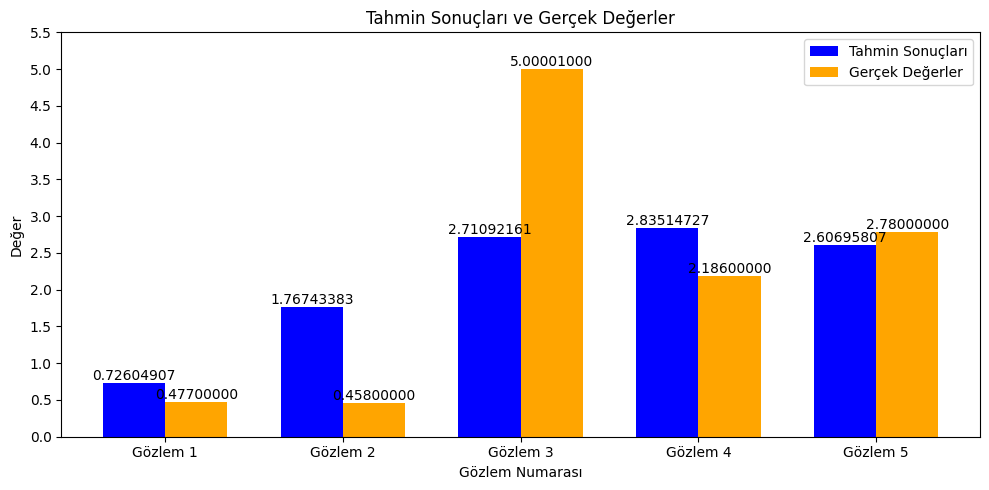

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tahmin ve gerçek değerler
tahmin_sonuclari = [0.72604907, 1.76743383, 2.71092161, 2.83514727, 2.60695807]
gercek_degerler = [0.477, 0.458, 5.00001, 2.186, 2.78]

# X eksenini oluşturma
x = np.arange(len(tahmin_sonuclari))  # Barların konumları
width = 0.35  # Bar genişliği

# Bar grafiği oluşturma
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, tahmin_sonuclari, width, label='Tahmin Sonuçları', color='blue')
bars2 = plt.bar(x + width/2, gercek_degerler, width, label='Gerçek Değerler', color='orange')

# Başlık ve etiketler
plt.title('Tahmin Sonuçları ve Gerçek Değerler')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Değer')
plt.xticks(x, [f'Gözlem {i+1}' for i in x])  # Gözlem numaralarını etiketleme
plt.legend()

# Küsuratlarıyla Y eksenindeki değerleri ayarlama
plt.yticks(np.arange(0, 6, 0.5))


# Barların değerlerini yazdırma
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.8f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.8f}', ha='center', va='bottom')

# Gösterme
plt.tight_layout()  # Yerleşimi iyileştirme
plt.show()


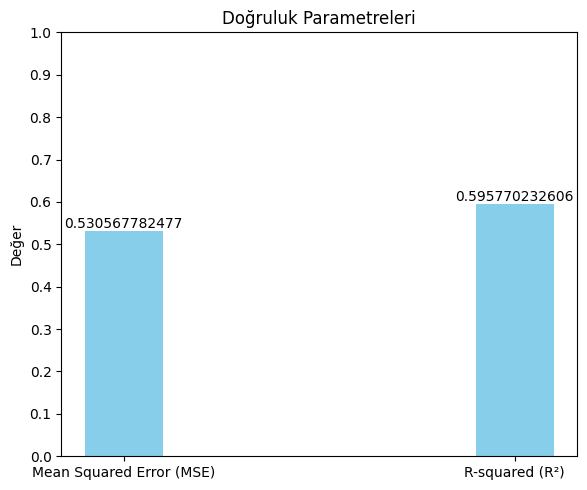

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Değerler
parametreler = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [0.530567782476676, 0.595770232606166]

# Bar grafiği oluşturma
x = np.arange(len(parametreler))  # Barların konumları
width = 0.2  # Bar genişliği

plt.figure(figsize=(6, 5))
bars = plt.bar(x, values, width, color='skyblue')

# Başlık ve etiketler
plt.title('Doğruluk Parametreleri')
plt.ylabel('Değer')
plt.xticks(x, parametreler)  # X eksenindeki metrikler

# Küsuratlarıyla Y eksenindeki değerleri ayarlama
plt.yticks(np.arange(0, 1.1, 0.1))

# Barların değerlerini yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.12f}', ha='center', va='bottom')

# Gösterme
plt.tight_layout()  # Yerleşimi iyileştirme
plt.show()

In [ ]:
# TensorFlow kütüphanesinin siteme dahil edilmesi ve veri setinin işleme alması

!pip install pydot
!apt-get install graphviz
!pip install tensorflow
# Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


MNIST veri seti üzerinde yapay zeka algoritmalarıyla işlemler gerçekleştirilir.

MNIST veri seti elle yazılmış rakamları içeren bir görüntü veri setidir. 0'dan 9'a kadar olan rakamları içeren 28x28 piksel boyutunda siyah-beyaz görüntülerden oluşmaktadır. Veri setinde toplamda 70000 adet veri bulunmaktadır.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
/content/drive/MyDrive/YapayZeka


# Yapay modeli oluşturmada aşamalar


---

1. Modelin Oluşturulması -> model = models.Sequential()


---
2. Flatten Katmanı -> layers.Flatten(input_shape=(28,28)) 2 boyutlu veriyi tek boyutlu vektöre (784) çeviren fonksiyondur.
---

3. Dense katmanı
---

4. Dropout Katmanı -> layers.Dropout(0,2)
%20'sini rastgele alıyor
---
5. Çıkış Katmanı (Dense Katmanı ve Softmax Aktivasyon Fonksiyonu)
--> layers.Dense(10,activation = 'softmax')

In [ ]:
model =models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0,2),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Modelin Eğitim Süreci

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Modelin eğitim süreci
1. model eğitim işlemi --> model.fit()
---
2. Optimizasyon Algoritması -> optimizer = 'adam'
---
3. Kayıp fonksiyonu --> loss='...................'

sparse_categorical_crossentropy: Çoklu sınıflandırma problemlerinde kullanılır.

binary_crossentropy: İkili sınıflandırma problemlerinde kullanılır.

categorical_crossentropy: Çok sınıflı sınıflanrıma problemlerinde kullanılır

mean_squared_error (MSE): Tahmin edilen değer ile gerçek değer arasındaki farkın karesinin ortalamasıdır.
---
4. Başarı değerlerinin elde edilmesi -->metrics=['accuracy']
* Accuracy
* Precision
* Recall
* F1-Score

5. Model eğitim işlemi --> model.fit()

6. Model eğitim işlemi --> model.fit(x_train, y_train)

7. Modelin eğitilmesi adımı --> epochs=5

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8733 - loss: 0.4428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9762 - loss: 0.0791
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9832 - loss: 0.0551
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9867 - loss: 0.0423


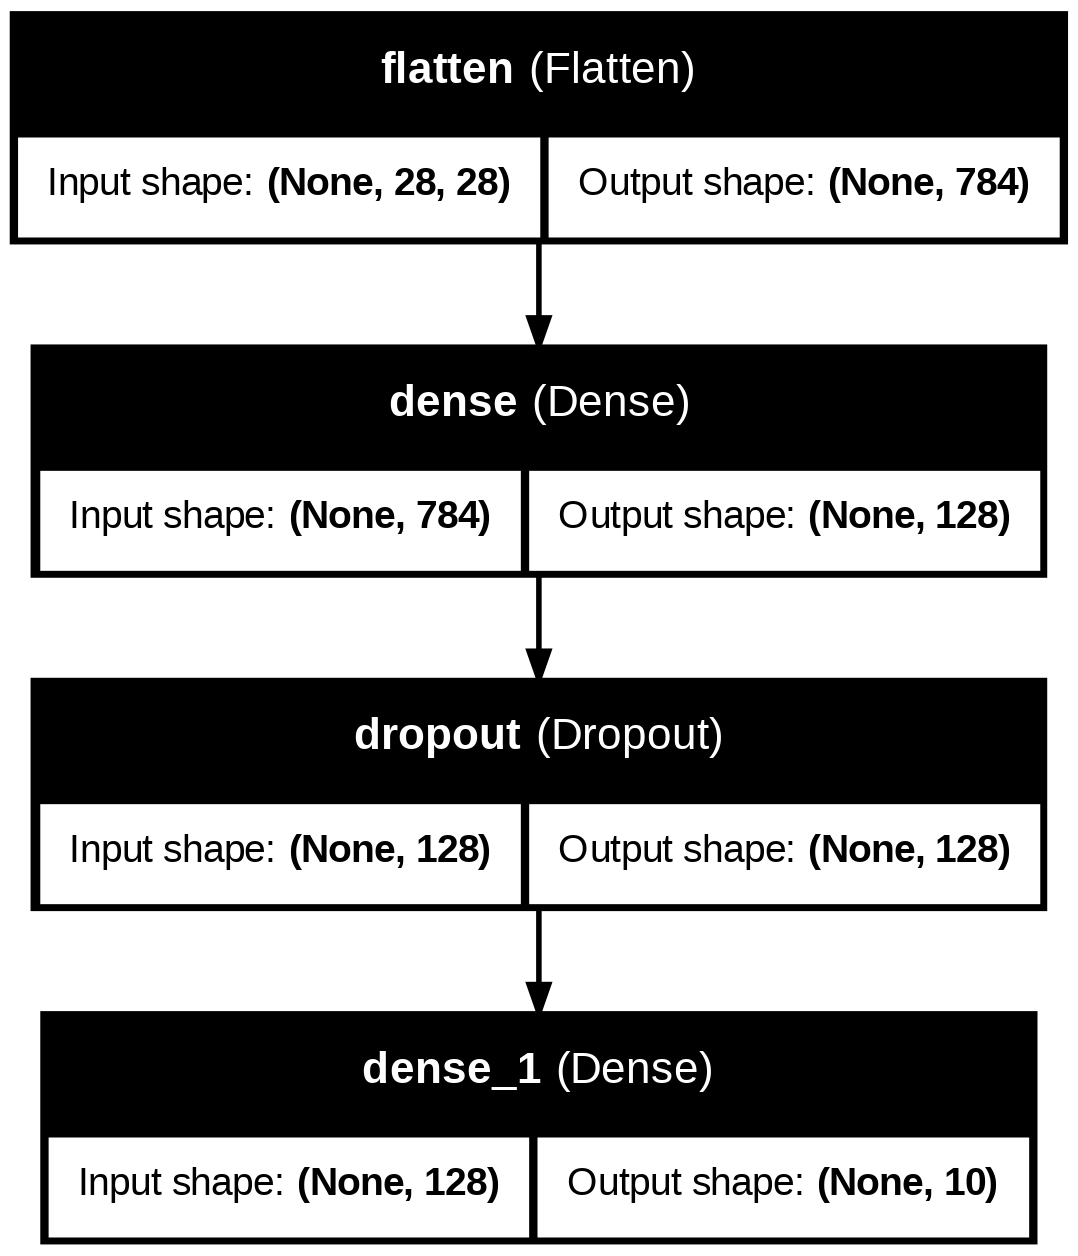

In [ ]:
# Model eğitimi

model.fit(x_train, y_train, epochs=5)

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanılması

plot_model(model, to_file='YZ_model/yz_tensorflow_ciktisi.png',show_shapes=True, show_layer_names=True) # Modelin Çıktısı

In [ ]:
# Test seti üzerinde modelin performansını değerlendirme

hata_orani, basari_orani = model.evaluate(x_test, y_test, verbose=2)

print("Modelin doğruluk oranı: %", basari_orani * 100)
print("Modelin hata oranı: %", hata_orani * 100)

313/313 - 2s - 7ms/step - accuracy: 0.9757 - loss: 0.0793
Modelin doğruluk oranı: % 97.57000207901001
Modelin hata oranı: % 7.929933071136475


# 3. PyTorch Kütüphanesi

In [ ]:
!pip install torch torchvision torchaudio

Epoch 1, Loss: 0.7412576036793845, Accuracy: 82.09166666666667%
Epoch 2, Loss: 0.36796926403604846, Accuracy: 89.52166666666666%
Epoch 3, Loss: 0.32382169979086306, Accuracy: 90.635%
Epoch 4, Loss: 0.29872942789753615, Accuracy: 91.39666666666666%
Epoch 5, Loss: 0.2792464511623896, Accuracy: 91.895%
Epoch 6, Loss: 0.2603903682167723, Accuracy: 92.49%
Epoch 7, Loss: 0.24350931650714708, Accuracy: 93.05166666666666%
Epoch 8, Loss: 0.22777232229868485, Accuracy: 93.45666666666666%
Epoch 9, Loss: 0.21376085244039736, Accuracy: 93.86833333333334%
Epoch 10, Loss: 0.2005959058017619, Accuracy: 94.27666666666667%
Epoch 11, Loss: 0.1887854624118632, Accuracy: 94.60333333333334%
Epoch 12, Loss: 0.1785455074494899, Accuracy: 94.925%
Epoch 13, Loss: 0.16898906516677725, Accuracy: 95.14333333333333%
Epoch 14, Loss: 0.16034796124479092, Accuracy: 95.40666666666667%
Epoch 15, Loss: 0.15277366547076815, Accuracy: 95.64833333333333%
Epoch 16, Loss: 0.14528125462962238, Accuracy: 95.83166666666666%
Epoc

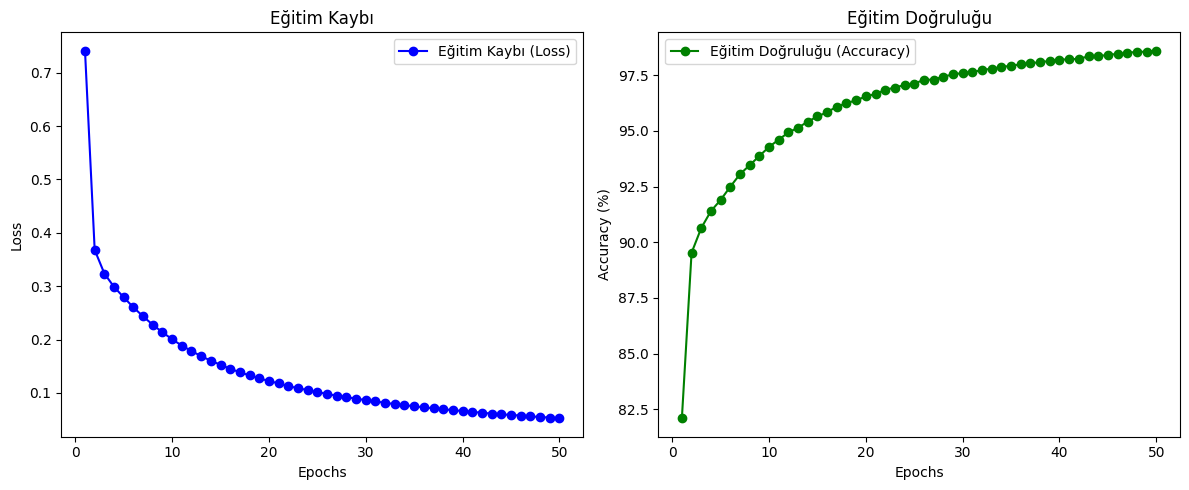

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Modeli oluşturma
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim için boş listeler tanımla
train_losses = []
train_accuracies = []

# Eğitme döngüsü
for epoch in range(50):  # 50 epoch boyunca eğit
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Kayıp (loss) değerini topla
        running_loss += loss.item()

        # Doğruluğu hesapla
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

print('Eğitim tamamlandı!')

# Eğitim sonuçlarını grafikle göster
epochs = range(1, 51)  # 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı (Loss)')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Eğitim Doğruluğu (Accuracy)')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()